In [23]:
library(Seurat)
library(ggplot2)
library(RColorBrewer)
library(viridis)
library(dplyr)
library(DESeq2)
library(dplyr)
library(ggrepel)
library(patchwork)
library(viridis)
library(EnhancedVolcano)
library(pheatmap)
library(clusterProfiler)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‚ÄòBiocGenerics‚Äô


The following objects are masked from ‚Äòpackage:dplyr‚Äô:

    combine, intersect, setdiff, union


The following object is masked from ‚Äòpackage:SeuratObject‚Äô:

    intersect


The following objects are masked from ‚Äòpackage:stats‚Äô:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‚Äòpackage:base‚Äô:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‚ÄòS4Vectors‚Äô


The following objects are masked from ‚Äòpackage:dplyr‚Äô:

    first, ren

In [2]:
sce <- readRDS('after_single.rds')
gene_signature_config <- list(
  DP_DPlike = c("Rspo3", "Prlr", "Bmp4", "Bmp7", "Trps1"),
  pathway_name = "Dermal Papilla Signature",
  analysis_type = "marker_expression"
)

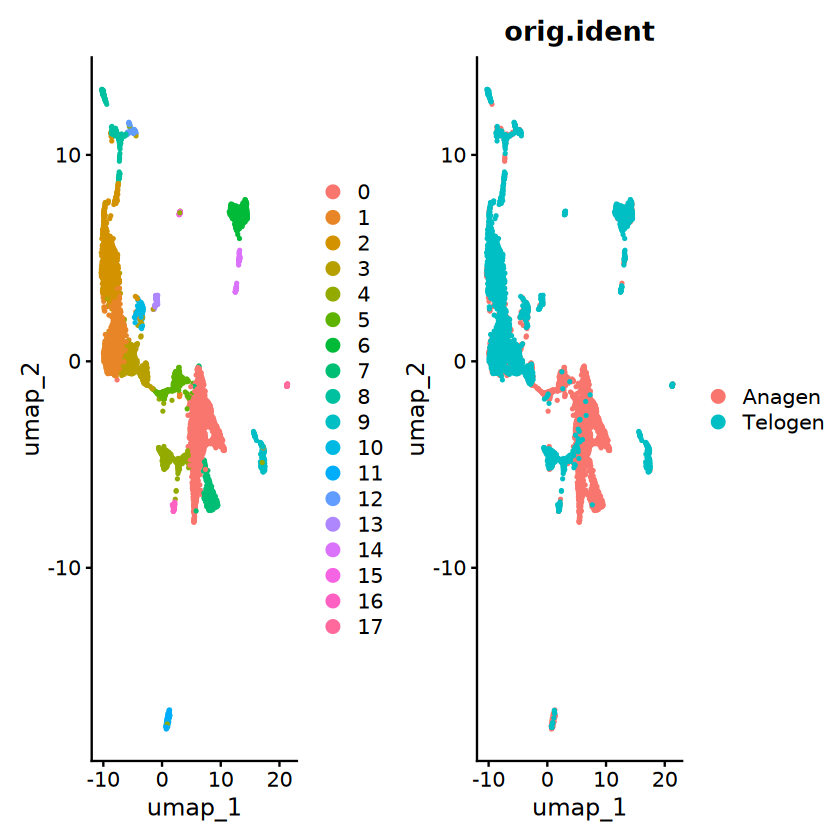

In [11]:
DimPlot(sce)|DimPlot(sce,group.by = 'orig.ident')

In [6]:
create_enhanced_dotplot <- function(seurat_obj, 
                                  gene_list, 
                                  group_by = NULL,
                                  title = NULL,
                                  color_palette = "viridis",
                                  size_range = c(1, 8)) {
  
  # È™åËØÅÂü∫Âõ†Â≠òÂú®ÊÄß
  available_genes <- intersect(gene_list, rownames(seurat_obj))
  missing_genes <- setdiff(gene_list, available_genes)
  
  if(length(missing_genes) > 0) {
    warning("Missing genes: ", paste(missing_genes, collapse = ", "))
  }
  
  cat("üìä Creating enhanced DotPlot for", length(available_genes), "genes\n")
  
  # Âü∫Á°ÄDotPlot
  p <- DotPlot(seurat_obj, 
               features = available_genes,
               assay = 'RNA',
               group.by = group_by,
               scale = TRUE) +  # Ê†áÂáÜÂåñË°®ËææÈáè
    
    # ‰∏ªÈ¢òÁæéÂåñ
    theme_minimal() +
    theme(
      # ÂùêÊ†áËΩ¥
      axis.text.x = element_text(
        angle = 45, 
        hjust = 1, 
        vjust = 1,
        size = 11,
        face = "italic"  # Âü∫Âõ†ÂêçÊñú‰Ωì
      ),
      axis.text.y = element_text(size = 11, face = "bold"),
      
      # Èù¢ÊùøËÆæÁΩÆ
      panel.grid.major = element_line(color = "grey90", size = 0.2),
      panel.grid.minor = element_blank(),
      panel.border = element_rect(color = "black", fill = NA, size = 0.5),
      
      # Âõæ‰æã
      legend.position = "right",
      legend.title = element_text(size = 10, face = "bold"),
      legend.text = element_text(size = 9),
      legend.box = "vertical",
      
      # Ê†áÈ¢ò
      plot.title = element_text(size = 14, face = "bold", hjust = 0.5),
      plot.subtitle = element_text(size = 11, hjust = 0.5, color = "grey40")
    ) +
    
    # ÂùêÊ†áËΩ¥Ê†áÁ≠æ
    labs(
      x = "Gene Markers",
      y = "Cell Types",
      title = title %||% "Expression Pattern Analysis",
      subtitle = paste("n =", length(available_genes), "genes")
    ) +
    
    # Âõæ‰æãÊ†áÈ¢ò
    guides(
      size = guide_legend(
        title = "% Expression",
        override.aes = list(color = "black"),
        title.position = "top"
      ),
      color = guide_colorbar(
        title = "Avg Expression\n(scaled)",
        title.position = "top",
        barwidth = 1,
        barheight = 6
      )
    )
  
  # È¢úËâ≤ÈÖçÁΩÆ
  if(color_palette == "viridis") {
    p <- p + scale_color_viridis_c(option = "plasma", direction = 1)
  } else if(color_palette == "custom") {
    p <- p + scale_color_gradientn(
      colours = c('#330066', '#336699', '#66CC66', '#FFCC33') ,
      name = "Scaled\nExpression"
    )
  } else if(color_palette == "academic") {
    p <- p + scale_color_gradient2(
      low = "#313695", 
      mid = "white", 
      high = "#D73027",
      midpoint = 0,
      name = "Scaled\nExpression"
    )
  }
  
  # ÁÇπÂ§ßÂ∞èËåÉÂõ¥
  p <- p + scale_size_continuous(range = size_range)
  
  return(p)
}

In [7]:
# ÂàõÂª∫Â¢ûÂº∫ÁâàDotPlot
enhanced_plot <- create_enhanced_dotplot(
  seurat_obj = sce,
  gene_list = gene_signature_config$DP_DPlike,
  title = gene_signature_config$pathway_name,
  color_palette = "custom",
  size_range = c(2, 10)
)

üìä Creating enhanced DotPlot for 5 genes


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


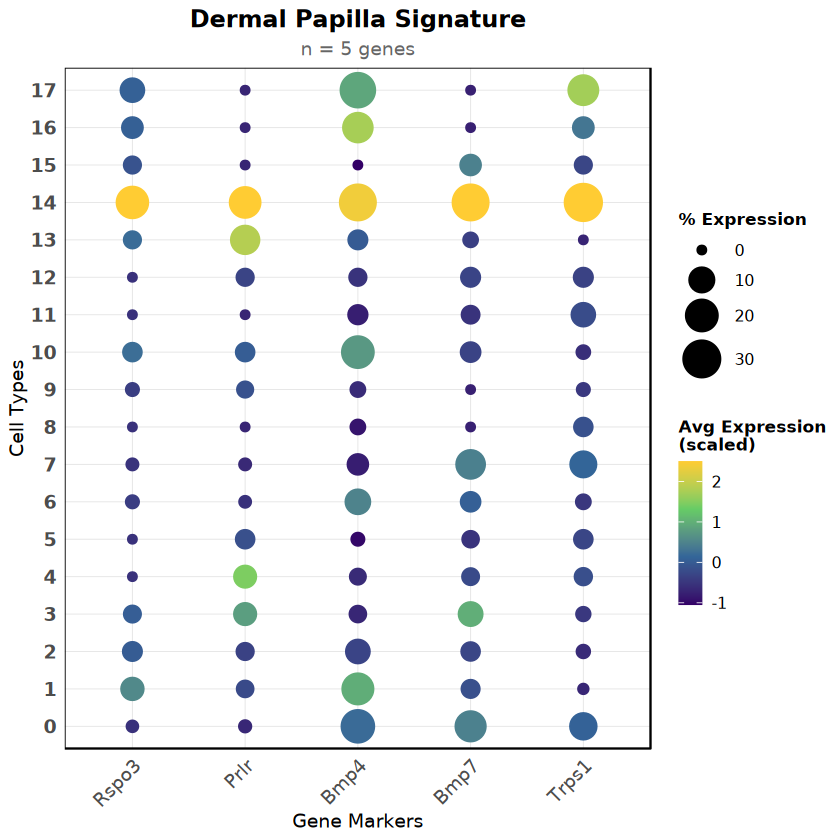

In [8]:
print(enhanced_plot)

Warning message:
‚ÄúThe `slot` argument of `FetchData()` is deprecated as of SeuratObject 5.0.0.
‚Ñπ Please use the `layer` argument instead.
‚Ñπ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.‚Äù
Warning message:
‚ÄúThe following requested variables were not found: Bmp5‚Äù
Warning message:
‚Äú`PackageCheck()` was deprecated in SeuratObject 5.0.0.
‚Ñπ Please use `rlang::check_installed()` instead.
‚Ñπ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.‚Äù


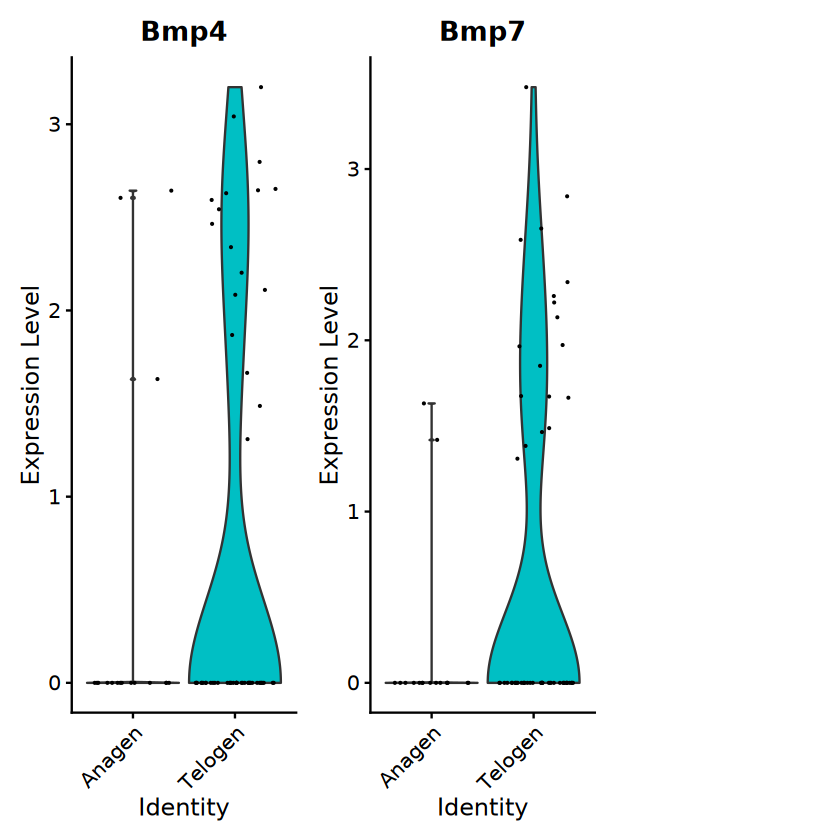

In [12]:
filter_sce = subset(sce, RNA_snn_res.0.2 %in% c(14)) 
VlnPlot(filter_sce, features = c('Bmp4','Bmp7','Bmp5'),group.by = 'orig.ident')

In [13]:
DifferentialAnalysisConfig <- R6::R6Class(
  "DifferentialAnalysisConfig",
  public = list(
    seurat_object = NULL,
    comparison_groups = list(),
    analysis_parameters = list(),
    results_storage = list(),
    
    initialize = function(seurat_obj) {
      self$seurat_object <- seurat_obj
      self$setup_default_parameters()
      cat("üî¨ DEG Analysis Pipeline Initialized\n")
    },
    
    setup_default_parameters = function() {
      self$analysis_parameters <- list(
        test_method = "DESeq2",
        slot_type = "counts",
        p_threshold = 0.05,
        fc_threshold = 1,
        pct_threshold = 0.75,
        verbose_mode = FALSE
      )
    }
  )
)

In [14]:
deg_analyzer <- DifferentialAnalysisConfig$new(filter_sce)

üî¨ DEG Analysis Pipeline Initialized


In [46]:
execute_comprehensive_deg_analysis <- function(seurat_obj, 
                                              group_var = "orig.ident",
                                              comparison_pairs = list(c("Anagen", "Telogen")),
                                              analysis_name = "stage_comparison") {
  
  cat("üöÄ Starting Comprehensive DEG Analysis...\n")
  cat("üìä Dataset Info:", ncol(seurat_obj), "cells,", nrow(seurat_obj), "genes\n")
  
  # Âä®ÊÄÅËÆæÁΩÆË∫´‰ªΩ
  original_idents <- Idents(seurat_obj)
  Idents(seurat_obj) <- group_var
  
  # Â∑ÆÂºÇÂàÜÊûêÁªìÊûúÂÆπÂô®
  comprehensive_results <- list(
    raw_results = data.frame(),
    processed_results = data.frame(),
    statistics = list(),
    metadata = list(
      analysis_date = Sys.time(),
      parameters = list(
        group_variable = group_var,
        comparisons = comparison_pairs,
        analysis_name = analysis_name
      )
    )
  )
  
  # ÊâßË°åÊâπÈáèÂ∑ÆÂºÇÂàÜÊûê
  for (i in seq_along(comparison_pairs)) {
    pair <- comparison_pairs[[i]]
    id1 <- pair[1]
    id2 <- pair[2]
    
    cat("üîç Processing comparison:", id1, "vs", id2, "\n")
    
    # ÁªÜËÉûÊï∞ÈáèÈ™åËØÅ
    n_cells_1 <- sum(Idents(seurat_obj) == id1)
    n_cells_2 <- sum(Idents(seurat_obj) == id2)
    
    cat("   Cell counts - ", id1, ":", n_cells_1, ", ", id2, ":", n_cells_2, "\n")
    
    if (n_cells_1 < 10 || n_cells_2 < 10) {
      warning("Insufficient cells for robust analysis in comparison ", i)
      next
    }
    
    # ÊâßË°åÂ∑ÆÂºÇË°®ËææÂàÜÊûê
    tryCatch({
      deg_results <- FindMarkers(
        seurat_obj, 
        ident.1 = id1, 
        ident.2 = id2, 
        slot = "counts",
        test.use = "DESeq2", 
        verbose = FALSE,
        min.pct = 0.75,  # ÊúÄÂ∞èË°®ËææÁôæÂàÜÊØî
        logfc.threshold = 1  # ÊúÄÂ∞èfold changeÈòàÂÄº
      )
      
      # Êï∞ÊçÆÂ¢ûÂº∫Â§ÑÁêÜ
      deg_results$gene <- rownames(deg_results)
      deg_results$comparison <- paste0(id1, " vs ", id2)
      deg_results$comparison_id <- i
      deg_results$abs_log2FC <- abs(deg_results$avg_log2FC)
      deg_results$log10_pval <- -log10(deg_results$p_val)
      deg_results$rank_score <- deg_results$abs_log2FC * deg_results$log10_pval
      
      # Ê∑ªÂä†Âà∞ÁªºÂêàÁªìÊûú
      comprehensive_results$raw_results <- rbind(comprehensive_results$raw_results, deg_results)
      
      cat("   ‚úÖ Found", nrow(deg_results), "tested genes\n")
      
    }, error = function(e) {
      cat("   ‚ùå Error in comparison", i, ":", e$message, "\n")
    })
  }
  
  # ÊÅ¢Â§çÂéüÂßãË∫´‰ªΩ
  Idents(seurat_obj) <- original_idents
  
  return(comprehensive_results)
}

# ÊâßË°åÂàÜÊûê
cat("üî¨ Executing Comprehensive Analysis Pipeline...\n")
sub <- filter_sce
comprehensive_deg_results <- execute_comprehensive_deg_analysis(
  seurat_obj = sub,
  group_var = "orig.ident",
  comparison_pairs = list(c("Anagen", "Telogen")),
  analysis_name = "hair_cycle_analysis"
)


üî¨ Executing Comprehensive Analysis Pipeline...
üöÄ Starting Comprehensive DEG Analysis...
üìä Dataset Info: 72 cells, 15363 genes
üîç Processing comparison: Anagen vs Telogen 
   Cell counts -  Anagen : 17 ,  Telogen : 55 


converting counts to integer mode

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



   ‚úÖ Found 209 tested genes


In [47]:
process_deg_results_advanced <- function(raw_results, 
                                        p_threshold = 0.01,
                                        fc_threshold = 1,
                                        pct_threshold = 0.75) {
  
  cat("üìà Processing DEG Results with Advanced Metrics...\n")
  
  processed_data <- raw_results %>%
    mutate(
      # Âü∫Á°ÄÂàÜÁ±ª
      basic_labels = case_when(
        p_val < p_threshold & abs(avg_log2FC) > fc_threshold & pct.1 > pct_threshold & avg_log2FC > 0 ~ 'sigUp',
        p_val < p_threshold & abs(avg_log2FC) > fc_threshold & pct.1 > pct_threshold & avg_log2FC < 0 ~ 'sigDown',
        TRUE ~ 'noSig'
      ),
      
      # Â¢ûÂº∫ÂàÜÁ±ªÁ≥ªÁªü
      enhanced_labels = case_when(
        p_val < 0.001 & abs(avg_log2FC) > 2 ~ 'Highly_Significant',
        p_val < 0.01 & abs(avg_log2FC) > 1.5 ~ 'Very_Significant', 
        p_val < 0.05 & abs(avg_log2FC) > 1 ~ 'Significant',
        p_val < 0.05 & abs(avg_log2FC) > 0.5 ~ 'Moderately_Significant',
        TRUE ~ 'Not_Significant'
      ),
      
      # ÈÄèÊòéÂ∫¶Êò†Â∞Ñ
      point_alpha = case_when(
        basic_labels == 'sigUp' ~ 0.8,
        basic_labels == 'sigDown' ~ 0.8,
        TRUE ~ 0.3
      ),
      
      # ÁÇπÂ§ßÂ∞èÊò†Â∞Ñ
      point_size = pmin(pmax(abs(avg_log2FC) * 2, 1), 6),
      
      # ÈáçË¶ÅÊÄßËØÑÂàÜ
      importance_score = abs(avg_log2FC) * (-log10(p_val)) * (pct.1/100)
    ) %>%
    arrange(desc(importance_score))
  
  # ÁªüËÆ°ÊëòË¶Å
  summary_stats <- list(
    total_genes = nrow(processed_data),
    significant_up = sum(processed_data$basic_labels == 'sigUp'),
    significant_down = sum(processed_data$basic_labels == 'sigDown'),
    not_significant = sum(processed_data$basic_labels == 'noSig'),
    highly_significant = sum(processed_data$enhanced_labels == 'Highly_Significant'),
    mean_log2fc = mean(abs(processed_data$avg_log2FC)),
    median_pval = median(processed_data$p_val)
  )
  
  cat("üìä Analysis Summary:\n")
  cat("   Total genes tested:", summary_stats$total_genes, "\n")
  cat("   Significantly upregulated:", summary_stats$significant_up, "\n")
  cat("   Significantly downregulated:", summary_stats$significant_down, "\n")
  cat("   Highly significant:", summary_stats$highly_significant, "\n")
  
  return(list(data = processed_data, stats = summary_stats))
}


In [48]:
processed_results <- process_deg_results_advanced(comprehensive_deg_results$raw_results)
deg_temp <- processed_results$data

üìà Processing DEG Results with Advanced Metrics...
üìä Analysis Summary:
   Total genes tested: 209 
   Significantly upregulated: 26 
   Significantly downregulated: 2 
   Highly significant: 7 


In [49]:
select_genes_for_labeling <- function(deg_data, n_top = 10, criteria = "importance") {
  
  if (criteria == "importance") {
    top_genes <- deg_data %>%
      filter(basic_labels != 'noSig') %>%
      slice_max(order_by = importance_score, n = n_top) %>%
      pull(gene)
  } else if (criteria == "fold_change") {
    top_genes <- deg_data %>%
      filter(basic_labels != 'noSig') %>%
      slice_max(order_by = abs(avg_log2FC), n = n_top) %>%
      pull(gene)
  } else {
    top_genes <- deg_data %>%
      filter(basic_labels != 'noSig') %>%
      slice_min(order_by = p_val, n = n_top) %>%
      pull(gene)
  }
  
  return(top_genes)
}


In [54]:
# Âä®ÊÄÅÈÄâÊã©Ê†áÊ≥®Âü∫Âõ†
genes_to_label <- select_genes_for_labeling(deg_temp, n_top = 30, criteria = "importance")

# Â¢ûÂº∫ÂûãÁÅ´Â±±ÂõæÁîüÊàêÂô®  
create_enhanced_volcano_plot <- function(deg_data, 
                                       genes_to_label,
                                       title = "Enhanced Volcano Plot",
                                       coordinate_limits = list(x = c(-3, 3), y = c(0, 5))) {
  
  cat("üåã Creating Enhanced Volcano Plot...\n")
  
  # ‰∏ªË¶ÅÁÅ´Â±±Âõæ
  volcano_plot <- ggplot(deg_data, aes(x = avg_log2FC, y = -log10(p_val))) +
    
    # ËÉåÊôØÂèÇËÄÉÁ∫ø
    geom_hline(yintercept = -log10(0.05), linetype = "dashed", color = "grey60", alpha = 0.7) +
    geom_vline(xintercept = c(-1, 1), linetype = "dashed", color = "grey60", alpha = 0.7) +
    
    # Êï£ÁÇπÂõæ - ‰ΩøÁî®Âä®ÊÄÅÂ§ßÂ∞èÂíåÈÄèÊòéÂ∫¶
    geom_point(aes(fill = basic_labels, 
                   alpha = point_alpha,
                   size = point_size),
               shape = 21, 
               stroke = 0.1) +
    
    # Âü∫Âõ†Ê†áÊ≥®
    geom_text_repel(
      data = subset(deg_data, gene %in% genes_to_label),
      aes(label = gene),
      size = 4,  
      box.padding = unit(0.5, "lines"),
      point.padding = unit(0.5, "lines"),
      segment.color = "gray40",
      segment.size = 0.5,
      max.overlaps = Inf,
      show.legend = FALSE,
      fontface = "italic"
    ) +
    
    # È¢úËâ≤ÂíåÂ§ßÂ∞èÊò†Â∞Ñ
    scale_fill_manual(
      values = c("sigUp" = "#E74C3C", "sigDown" = "#3498DB", "noSig" = "#BDC3C7"),
      name = "Expression\nChange"
    ) +
    scale_alpha_identity() +
    scale_size_identity() +
    
    # ÂùêÊ†áËΩ¥ËÆæÁΩÆ
    scale_x_continuous(
      limits = coordinate_limits$x,
      breaks = seq(-3, 3, 1)
    ) +
    scale_y_continuous(
      limits = coordinate_limits$y,
      expand = c(0.02, 0)
    ) +
    
    # Ê†áÁ≠æÂíå‰∏ªÈ¢ò
    labs(
      x = expression(Log[2]~"Fold Change"),
      y = expression(-Log[10]~"(P-value)"),
      title = title,
      subtitle = paste("Significant genes:", 
                      sum(deg_data$basic_labels != 'noSig'),
                      "| Total tested:", nrow(deg_data))
    ) +
    
    # È´òÁ∫ß‰∏ªÈ¢ò
    theme_minimal(base_size = 12) +
    theme(
      panel.grid.major = element_line(color = "grey90", size = 0.3),
      panel.grid.minor = element_blank(),
      panel.border = element_rect(color = "black", fill = NA, size = 0.5),
      
      plot.title = element_text(size = 14, face = "bold", hjust = 0.5),
      plot.subtitle = element_text(size = 11, hjust = 0.5, color = "grey40"),
      
      axis.title = element_text(size = 12, face = "bold"),
      axis.text = element_text(size = 10),
      
      legend.position = "right",
      legend.title = element_text(size = 10, face = "bold"),
      legend.text = element_text(size = 9),
      legend.box.background = element_rect(color = "grey80", fill = "white"),
      
      plot.margin = margin(t = 20, r = 20, b = 20, l = 20)
    ) 
  
  return(volcano_plot)
}


In [55]:
enhanced_volcano <- create_enhanced_volcano_plot(
  deg_data = deg_temp,
  genes_to_label = genes_to_label,
  title = "Hair Cycle Stage Comparison: Anagen vs Telogen",
  coordinate_limits = list(x = c(-3, 3), y = c(0, 5))
)

üåã Creating Enhanced Volcano Plot...


Warning message:
‚ÄúRemoved 21 rows containing missing values or values outside the scale range (`geom_point()`).‚Äù
Warning message:
‚ÄúRemoved 9 rows containing missing values or values outside the scale range (`geom_text_repel()`).‚Äù


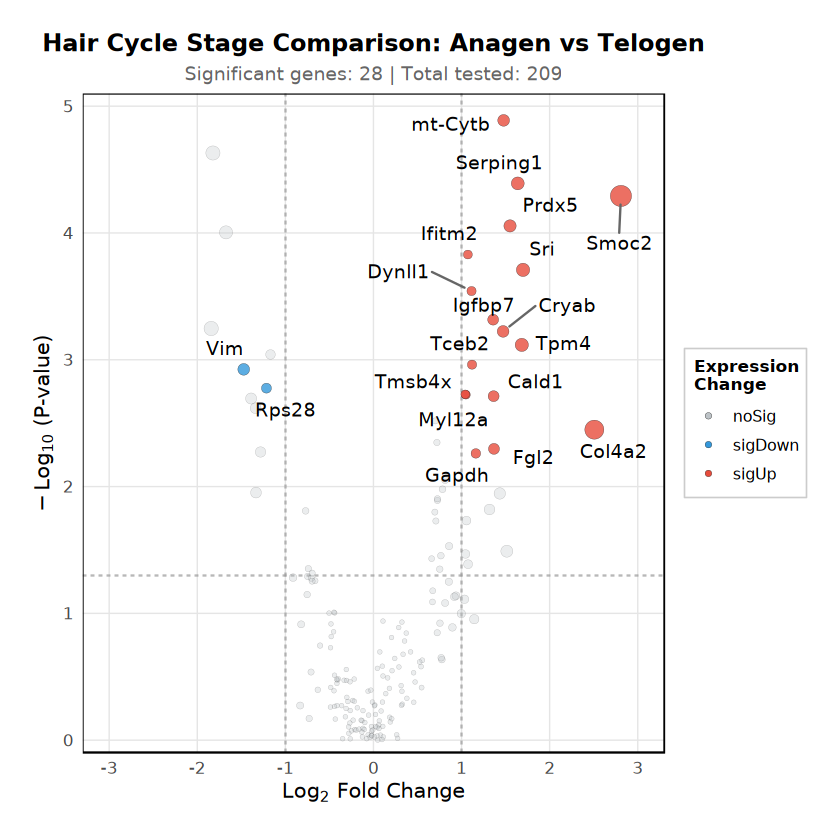

In [56]:
print(enhanced_volcano)

In [ ]:
# È´òÁ∫ßÁªìÊûúÂ§ÑÁêÜÂô®

# Â§ÑÁêÜÁªìÊûú


# Êô∫ËÉΩÂü∫Âõ†Ê†áÊ≥®ÈÄâÊã©Âô®


# ÁîüÊàêÊúÄÁªàÁöÑÂ¢ûÂº∫ÁÅ´Â±±Âõæ


# ÊòæÁ§∫ÂõæÂΩ¢

# ÁîüÊàêË°•ÂÖÖÂàÜÊûêÂõæË°®
supplementary_plots <- list(
  
  # TopÂü∫Âõ†Ë°®ËææÁÉ≠Âõæ
  top_genes_heatmap = {
    top_20_genes <- deg_temp %>%
      filter(basic_labels != 'noSig') %>%
      slice_max(order_by = importance_score, n = 20) %>%
      pull(gene)
    
    if(length(top_20_genes) > 0) {
      DoHeatmap(sub, features = top_20_genes, group.by = "orig.ident") +
        scale_fill_gradient2(low = "blue", mid = "white", high = "red") +
        theme(axis.text.y = element_text(size = 8))
    }
  },
  
  # ÁªüËÆ°ÊëòË¶ÅÂõæ
  summary_barplot = {
    summary_data <- data.frame(
      Category = c("Up-regulated", "Down-regulated", "Not significant"),
      Count = c(
        sum(deg_temp$basic_labels == 'sigUp'),
        sum(deg_temp$basic_labels == 'sigDown'), 
        sum(deg_temp$basic_labels == 'noSig')
      )
    )
    
    ggplot(summary_data, aes(x = Category, y = Count, fill = Category)) +
      geom_col(alpha = 0.8) +
      scale_fill_manual(values = c("#E74C3C", "#3498DB", "#BDC3C7")) +
      theme_minimal() +
      theme(legend.position = "none") +
      labs(title = "DEG Summary Statistics", y = "Number of Genes")
  }
)

# Â±ïÁ§∫Ë°•ÂÖÖÂõæË°®
if(!is.null(supplementary_plots$top_genes_heatmap)) {
  print(supplementary_plots$top_genes_heatmap)
}
print(supplementary_plots$summary_barplot)

# ‰øùÂ≠òÂàÜÊûêÁªìÊûú
save_analysis_results <- function(results, plots, output_dir = "DEG_Analysis_Results") {
  
  dir.create(output_dir, showWarnings = FALSE)
  
  # ‰øùÂ≠òÊï∞ÊçÆ
  write.csv(results$data, file.path(output_dir, "processed_deg_results.csv"), row.names = FALSE)
  saveRDS(results, file.path(output_dir, "complete_analysis_results.rds"))
  
  # ‰øùÂ≠òÂõæÁâá
  ggsave(file.path(output_dir, "enhanced_volcano_plot.pdf"), plot = enhanced_volcano, 
         width = 12, height = 8, dpi = 300)
  
  cat("üíæ Results saved to:", output_dir, "\n")
  
  return(file.path(output_dir))
}

# ‰øùÂ≠òÁªìÊûú 
output_path <- save_analysis_results(processed_results, list(volcano = enhanced_volcano))

cat("\nüéâ Enhanced DEG Analysis Pipeline Complete!\n")
cat("üìÅ Results available at:", output_path, "\n")

In [ ]:
sub <- filter_sce
colnames(sub)
Idents(sub) <- "orig.ident"
id1 <- c("Anagen")
id2 <- c("Telogen")
de_Mono <- data.frame()

#Âæ™ÁéØËøõË°å‰∏§‰∏§ÁªÑÈó¥Â∑ÆÂºÇÂàÜÊûêÔºå‰ΩøÁî®DESeq2ÊñπÊ≥ï
for (i in 1:length(id1)) {
  de_markers <- FindMarkers(sub, ident.1 = id1[i], ident.2 = id2[i], slot = "counts", 
                            test.use = "DESeq2", verbose = F) #ÂçïÊ¨°Âæ™ÁéØÁîüÊàêde_markersÂ∑ÆÂºÇÂü∫Âõ†Ë°®
  de_markers$gene <- rownames(de_markers) #ÁªôË°®Ê∑ªÂä†geneÂàó
  de_markers$stage <- paste0(id1[i]," vs ",id2[i]) #ÁªôË°®Ê∑ªÂä†ÊØîËæÉÁªÑÂà´Âàó
  de_Mono <- rbind(de_Mono,de_markers) #Ê∑ªÂä†Âà∞‰πãÂâçÁöÑÁªìÊûú‰∏ãÈù¢ÂêàÂπ∂‰∏∫‰∏Ä‰∏™Êï∞ÊçÆÊ°Ü
}
deg_temp = de_Mono
deg_temp$labels = ifelse(deg_temp$p_val < 0.05 & abs(deg_temp$avg_log2FC) > 1 & deg_temp$pct.1 > 0.75 ,
                        ifelse(deg_temp$avg_log2FC > 0 , 'sigUp','sigDown'),'noSig')
library(ggplot2)
library(dplyr)
library(ggrepel)



# ÁÅ´Â±±ÂõæÁªòÂà∂
p <- ggplot(deg_temp, aes(x = avg_log2FC, y = -log10(p_val))) +
  # ÁªòÂà∂Êï£ÁÇπÔºå‰ΩøÁî®Êñ∞ÁöÑÈÄèÊòéÂ∫¶Êò†Â∞Ñ
  geom_point(aes(fill = labels, alpha = point_alpha),
             shape = 21, 
             stroke = 0.1,  # Êó†ËæπÁïå
             size = 5) +
  # Ê†áÊ≥®ÊåáÂÆöÂü∫Âõ†
  geom_text_repel(
    data = subset(deg_temp, gene %in% genes_to_label),
    aes(label = gene),
    size = 4.5,  
    box.padding = unit(0.5, "lines"),
    point.padding = unit(0.5, "lines"),
    segment.color = "gray50",
    show.legend = FALSE
  ) +
  # ËÆæÁΩÆÂ°´ÂÖÖËâ≤
  scale_fill_manual(values = c("sigUp" = "red", "sigDown" = "skyblue", "noSig" = "#AAAAAA")) +
  # ÁßªÈô§alphaÁöÑÂõæ‰æã
  scale_alpha_identity() +
  # ÂùêÊ†áËΩ¥Âíå‰∏ªÈ¢òËÆæÁΩÆ
  labs(x = "Log2 fold change", y = "-Log10(p-value)") +
  theme_bw(base_size = 14) +
  theme(
    panel.grid = element_blank(),
    legend.position = "none"
  ) + 
  ylim(0, 5) + 
  xlim(-3, 3)

print(p)

In [ ]:
library(Seurat)
sce = readRDS('after_single.rds')
DP_DPlike = c("Rspo3", "Prlr", "Bmp4",'Bmp7','Trps1') #14
p <- DotPlot(sce, features = DP_DPlike, assay = 'RNA') +
#  coord_flip() +  # ÁøªËΩ¨ÂùêÊ†áËΩ¥
  theme(
    panel.grid = element_blank(),  # ÂéªÈô§ÁΩëÊ†ºÁ∫ø
    axis.text.x = element_text(angle = 45, hjust = 0.25, vjust = 0.25)  # ËÆæÁΩÆxËΩ¥ÊñáÊú¨ËßíÂ∫¶
  ) +
  labs(x = NULL, y = NULL) +  # ÁßªÈô§ÂùêÊ†áËΩ¥Ê†áÁ≠æ
  guides(size = guide_legend("Percent Expression")) +  # ËÆæÁΩÆÂõæ‰æãÊ†áÈ¢ò
  scale_color_gradientn(
    colours = c('#330066', '#336699', '#66CC66', '#FFCC33')  # ËÆæÁΩÆÈ¢úËâ≤Ê∏êÂèò
  )

p  # ÊòæÁ§∫ÂõæÂΩ¢